# Klasifikasi Risiko Perilaku Kanker Serviks Menggunakan Algoritma Random Forest

## Import Library

In [21]:
# Untuk data preprocessing
import pandas as pd

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

# Untuk modelling algoritma
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [22]:
import warnings

warnings.filterwarnings('ignore')

=====================================================================================================================================================

### Algoritma Random Forest
Algoritma Random Forest adalah salah satu algoritma supervised learning yang memiliki 2 variasi - Satu digunakan untuk masalah klasifikasi dan yang lainnya digunakan untuk masalah regresi. Random Forest merupakan salah satu algoritma yang flexibel dan mudah digunakan. Random Forest membuat pohon keputusan (Decision tree) dari sampel yang diberikan dan akan menciptakan prediksi dari setiap pohon dan akan memilih solusi terbaik melalui voting. Algoritma ini juga dapat digunakan sebagai indikator kepentingan suatu fitur

Algoritma Random Forest menggabungkan beberapa pohon keputusan, menghasilkan sebuah hutan , karena itulah disebut Random Forest. Dalam pengklasifikasi Random Forest, semakin tinggi jumlah pohon keputusan akan menghasilkan akurasi yang lebih tinggi.

### Dataset

Dataset berisi 19 atribut mengenai risiko perilaku ca serviks dengan label kelas ca serviks dengan nilai 1 dan 0 yang berarti responden dengan dan tanpa ca serviks.

- Sumber data: https://archive.ics.uci.edu/ml/datasets/Cervical+Cancer+Behavior+Risk

=====================================================================================================================================================

## 1. Preview Data

In [23]:
df = pd.read_csv("Data.csv")
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [25]:
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [26]:
df.shape

(72, 20)

## 2.Preprocessing Data

#### Handling missing data

In [27]:
#Mememeriksa nilai null di data
df.isna().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

Tidak terdapat nilai null dalam data

#### Handling Duplicate Value

In [28]:
# Memeriksa data duplicate
df.duplicated().sum()

0

#### Subset Feature dan Target

In [29]:
#Feature Variable
X = df.iloc[:,:-1]

#Target Variable
y = df.iloc[:,-1]

#### Split Data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## 3.EDA

In [31]:
pio.templates.default = "seaborn"


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "Bar"}, {"type": "pie"}]])


# Picture 1
caTrue = len(df[df["ca_cervix"] == 1])
caFalse = len(df[df["ca_cervix"] == 0])



fig.add_trace(go.Bar(x=["Penderita Kanker","Bukan Penderita"], y=[caTrue,caFalse],
                    marker=dict(color=["#71DFE7","#FFE652"])),
              row=1, col=1)


fig.add_trace(go.Pie(labels=["Penderita Kanker","Bukan Penderita"], values=[caTrue,caFalse],
                    hoverinfo="label+percent+name",textinfo="percent+label",
    pull=[0.01,0.01,0.05]),
              row=1, col=2)


fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
        ),
    ),
     margin=dict(
        autoexpand=False,
        l=100,
        t=100,
        r=100
    ),
    title_text='Perbandingan Penderita Kanker Serviks',yaxis_title="Jumlah",
    title_x=0.5
    )

fig.update_traces(showlegend=False)

fig.show()

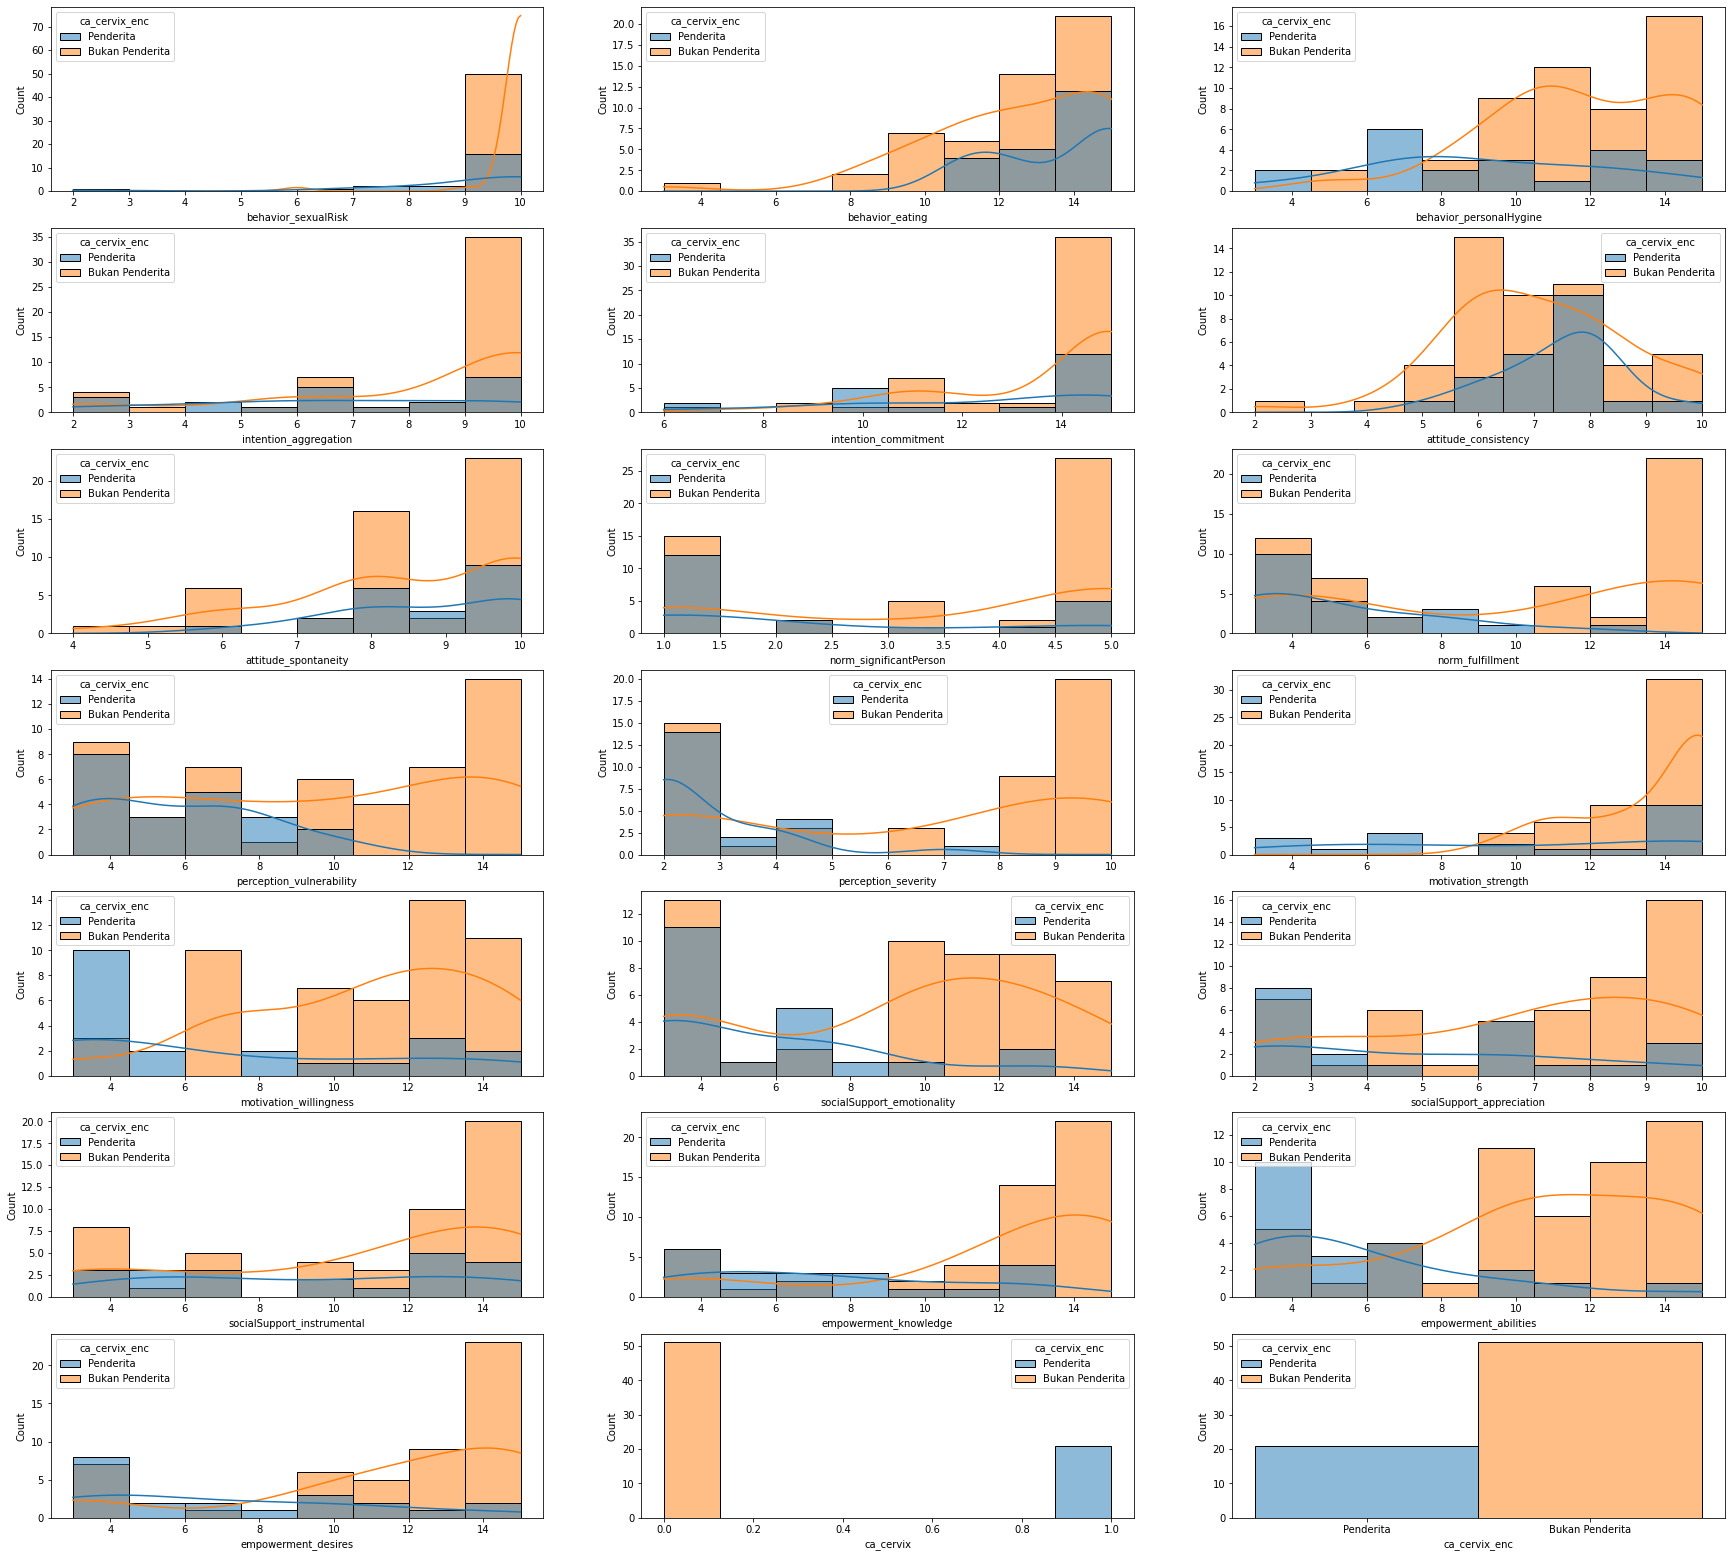

In [32]:
caT = df[df["ca_cervix"] == 1]
caF = df[df["ca_cervix"] == 0]
plt.figure(figsize=(30,40))
df["ca_cervix_enc"] = df["ca_cervix"].apply(lambda val: "Penderita" if val == 1 else "Bukan Penderita")
for i, column in enumerate(df.columns, 1):
    plt.subplot(10,3,i)
    sns.histplot(data=df,x=column,kde=True,hue="ca_cervix_enc")

<AxesSubplot:>

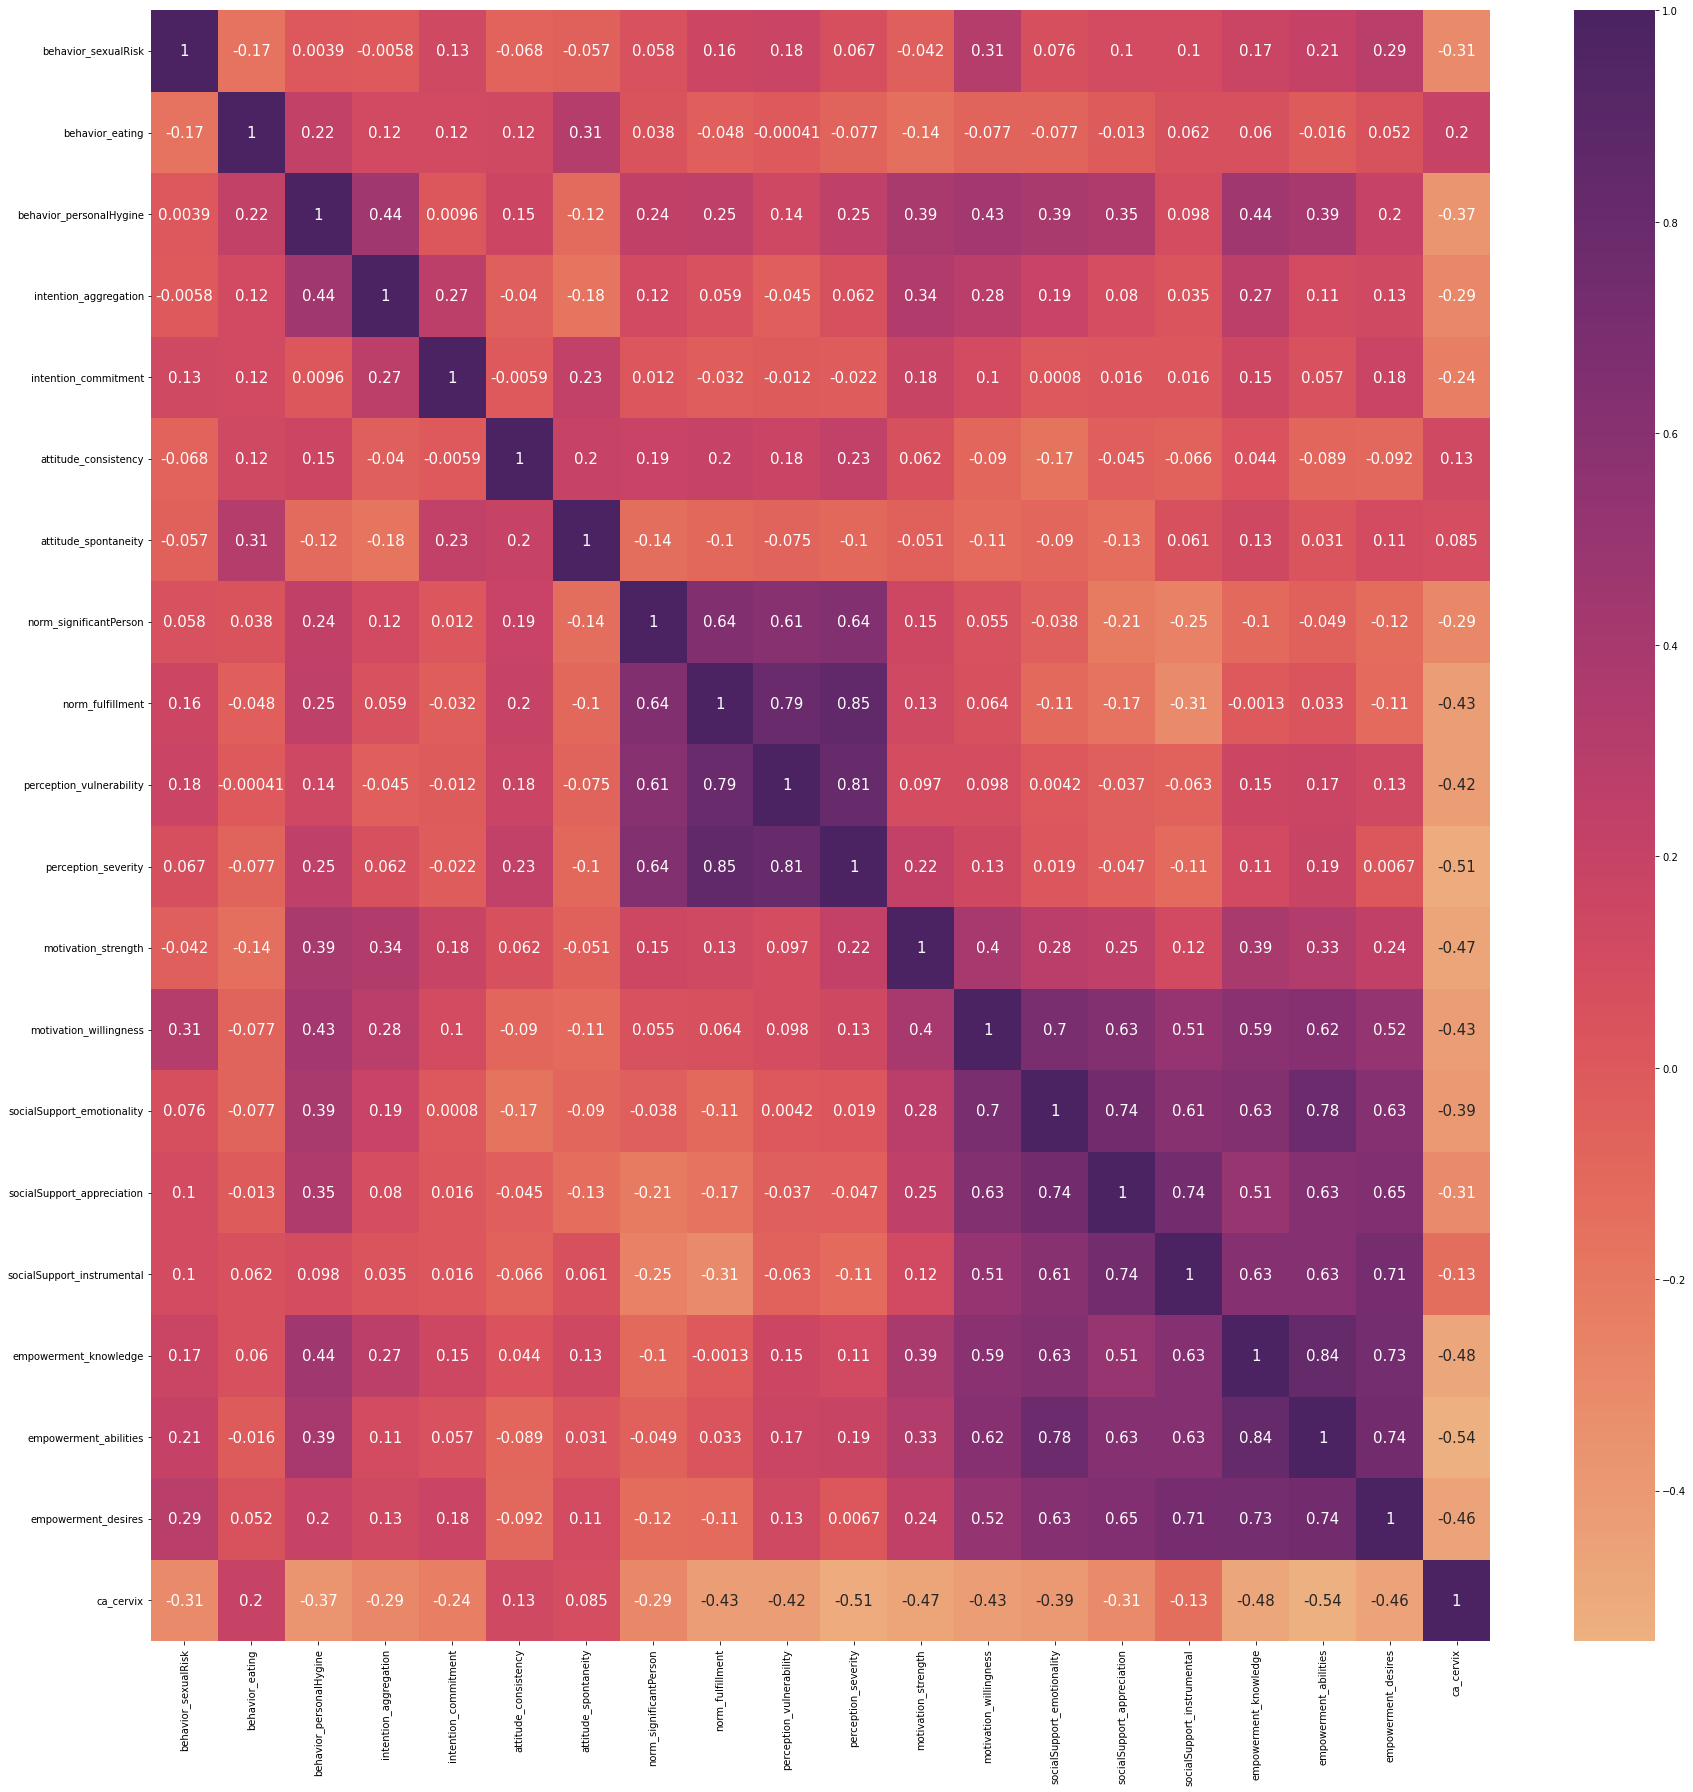

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True, cmap='flare', annot_kws={'size':15})

## 4.Modelling

#### Random Forest with Default Parameter

In [34]:
# instantiate the classifier 
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Akurasi model dengan 10 decision-tree : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Akurasi model dengan 10 decision-tree : 0.8889


Disini <B>y_pred</B> merupakan hasil prediksi dari data testing (test-set). Skor akurasi antara <B>y_pred</B> dan <B>y_test</B> adalah 81%

#### Feature Selection with Random Forest

In [35]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()
importances_sorted.head()

norm_significantPerson    0.011234
behavior_eating           0.014318
behavior_sexualRisk       0.015539
attitude_spontaneity      0.018821
attitude_consistency      0.024237
dtype: float64

In [36]:
pd.options.plotting.backend = "plotly"

fig = importances_sorted.plot.barh()
fig.update_traces(marker_color='rgb(144, 238, 144)')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',xaxis=dict(
        showgrid=False,
        showticklabels=True,
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
        ),
    ),
    width=1200,
    height=700,
    title_text='Feature Importance',yaxis_title="Feature"
    )

fig.update_yaxes(ticksuffix = "  ")
fig.show()

Dapat kita lihat fitur yang paling penting adalah *perception_severity* dan yang paling tidak penting adalah *behaviour_eating*

#### Modelling with GridSearch

In [37]:
param_grid = { "criterion" : ["gini", "entropy"], 
            "min_samples_leaf" : [1, 3,5, 10], 
            "min_samples_split" : [2,4, 10, 12, 16], 
            "n_estimators": [100, 400, 700, 1000]}

gsv = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

In [38]:
gs = gsv.fit(X_train, y_train)

In [39]:
print(gs.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
print("Akurasi Training Set : ",(gs.score(X_train,y_train)*100),"%")
y_predGs = gs.predict(X_test)
print('Akurasi model dengan 400 decision-tree : ',(accuracy_score(y_test, y_predGs)*100),"%")


Akurasi Training Set :  100.0 %
Akurasi model dengan 400 decision-tree :  88.88888888888889 %


#### OOB Evaluation

In [52]:
oob = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1,criterion='gini',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
oob.fit(X_train, y_train)
acc_test = oob.score(X_test,y_test)
acc_oob = oob.oob_score_
print("Test set accuracy: ",acc_test)
print("Oob set accuracy: ",acc_oob)


Test set accuracy:  0.8888888888888888
Oob set accuracy:  0.9074074074074074


#### Compare Model

In [ ]:

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier(),"Random Forest Classifier":RandomForestClassifier()}
results = []


for model in models.values():
  

  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  cv_results = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_results)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=results[0], name='Logistic Regression',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=results[1], name='KNN',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=results[2], name='Decision Tree Classifier',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=results[3], name='Random Forest Classifier',
                marker_color = 'indianred'))

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
        ),
    ),
     margin=dict(
        autoexpand=False,
        t=70,
        r=200
    ),
    width=1000,
    height=500,
    title_text='Performa Model Klasifikasi',
    xaxis_title="Algoritma Model",
    yaxis_title="Akurasi Model",
    )
fig.update_yaxes(ticksuffix = "%  ")
fig.show()

#### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_predGs)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6 0]
 [1 4]]


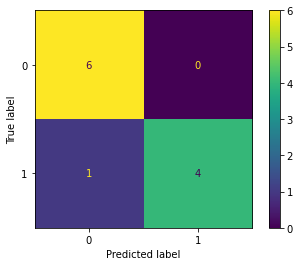

In [ ]:
plot_confusion_matrix(gs, X_test, y_test)  
plt.show()

#### Classification Report

In [ ]:
print(classification_report(y_test, y_predGs))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



#### ROC Curve

In [ ]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)


y_score1 = gs.predict_proba(X_test)[:,1]
y_score2 = clf_tree.predict_proba(X_test)[:,1]

print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_score2))

roc_auc_score for Random Forest:  1.0
roc_auc_score for Decision Tree:  0.9


In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

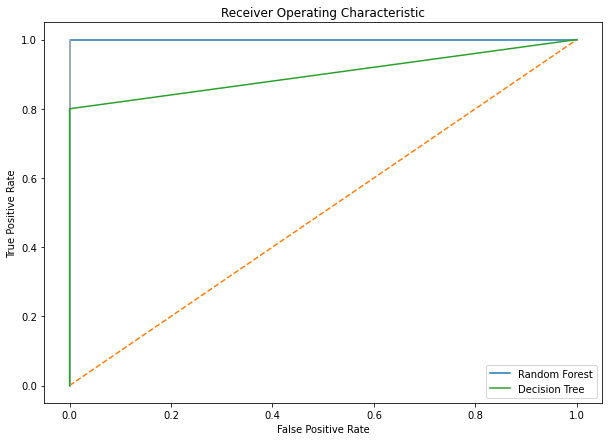

In [ ]:
plt.subplots(1, figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1,label="Random Forest")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(false_positive_rate2, true_positive_rate2,label="Decision Tree")
plt.legend()
plt.show()